In [1]:
# Q1) use dataset social_media_usage.csv. perform outlier analysis for the daily minutes spent column. do it for facebook and for instagram.

In [2]:
# facebook

In [3]:
# Import essential libraries for data manipulation and visualization

import numpy as np  # NumPy: Used for numerical operations, creating arrays, and performing mathematical computations
import pandas as pd  # Pandas: Helps in handling and analyzing structured data using DataFrames and Series
import matplotlib.pyplot as plt  # Matplotlib: Used for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn: Built on top of Matplotlib, provides aesthetically pleasing statistical plots


In [4]:
import pandas as pd  # Importing the Pandas library for data handling

# Step 1: Load the dataset into a DataFrame
# 'pd.read_csv()' is used to read CSV files and store them as a Pandas DataFrame
file_path = 'C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/social_media_usage.csv'
df = pd.read_csv(file_path)

# Step 2: Display the first five rows of the dataset
# 'df.head()' helps us quickly peek at the first few rows to understand the structure of the data
print("Displaying the first five rows of the dataset:")
print(df.head())  # This prints the first five rows in a readable format


Displaying the first five rows of the dataset:
  User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0     U_1  Pinterest                  288             16             94   
1     U_2   Facebook                  192             14            117   
2     U_3  Instagram                  351             13            120   
3     U_4     TikTok                   21             20            117   
4     U_5   LinkedIn                  241             16              9   

   Follows_Per_Day  
0                0  
1               15  
2               48  
3                8  
4               21  


In [5]:
df

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6


In [6]:
# Step 1: Extract rows where the 'App' column is 'Facebook'
# 'df.loc[df['App'] == 'Facebook']' filters the dataset to keep only rows related to Facebook
Daily_Minutes_Spent = df.loc[df['App'] == 'Facebook']

# Step 2: Display the filtered dataset
print("Filtered dataset: Rows where 'App' is Facebook")
print(Daily_Minutes_Spent)  # Prints the extracted rows for easy review


Filtered dataset: Rows where 'App' is Facebook
    User_ID       App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
1       U_2  Facebook                  192             14            117   
11     U_12  Facebook                  314             18            132   
14     U_15  Facebook                  434              2            111   
21     U_22  Facebook                  100             19             42   
23     U_24  Facebook                  221             15            127   
..      ...       ...                  ...            ...            ...   
974   U_975  Facebook                  241              1             60   
979   U_980  Facebook                  348              0            145   
983   U_984  Facebook                  485              2            187   
985   U_986  Facebook                  231              0             19   
997   U_998  Facebook                  318              6            105   

     Follows_Per_Day  
1                

In [7]:
# Step 1: Extract only the 'Daily_Minutes_Spent' column for Facebook users
# This selects only the relevant column from the previously filtered data
Facebook = Daily_Minutes_Spent['Daily_Minutes_Spent']

# Step 2: Display the extracted column
print("Daily minutes spent on Facebook:")
print(Facebook)  # Prints the extracted values for easy review


Daily minutes spent on Facebook:
1      192
11     314
14     434
21     100
23     221
      ... 
974    241
979    348
983    485
985    231
997    318
Name: Daily_Minutes_Spent, Length: 136, dtype: int64


In [8]:
import numpy as np  # Importing NumPy for statistical calculations

# Step 1: Calculate the 25th percentile (Q1)
# The 'np.percentile()' function finds the value below which 25% of the data falls
Q1 = np.percentile(Facebook, 25)

# Step 2: Calculate the 75th percentile (Q3)
# This finds the value below which 75% of the data falls
Q3 = np.percentile(Facebook, 75)

# Step 3: Compute the Interquartile Range (IQR)
# The IQR measures the spread of the middle 50% of the data
IQR = Q3 - Q1

# Step 4: Display the calculated values
print("75th Percentile (Q3):", Q3)
print("25th Percentile (Q1):", Q1)
print("Interquartile Range (IQR):", IQR)


75th Percentile (Q3): 400.25
25th Percentile (Q1): 105.5
Interquartile Range (IQR): 294.75


In [9]:
# Step 1: Calculate the lower bound for outliers
# Outliers are values that fall significantly outside the typical range.
# We set the lower bound as Q1 - 1.5 * IQR (values below this are potential outliers)
lower_bound = Q1 - 1.5 * IQR

# Step 2: Calculate the upper bound for outliers
# We set the upper bound as Q3 + 1.5 * IQR (values above this are potential outliers)
upper_bound = Q3 + 1.5 * IQR

# Step 3: Display the calculated bounds
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)


Lower Bound for Outliers: -336.625
Upper Bound for Outliers: 842.375


In [10]:
# Step 1: Identify outliers based on the calculated lower and upper bounds
# The condition (Facebook < lower_bound) | (Facebook > upper_bound) checks if values fall outside this range.
# The .index method then retrieves the row numbers of these outlier records.

outlier_indices = Facebook[(Facebook < lower_bound) | (Facebook > upper_bound)].index

# Step 2: Display the row indices of outlier records
print("Row numbers of outlier records:")
print(outlier_indices)  # Prints the indices where outliers are present


Row numbers of outlier records:
Index([], dtype='int64')


In [11]:
# Step 1: Print outlier rows based on identified indices
# 'df.loc[outlier_indices]' retrieves the rows from the original DataFrame
# where Facebook usage exceeds the upper bound or falls below the lower bound.

print("Outliers in Facebook Daily Usage Spent using the IQR method:")
print(df.loc[outlier_indices])  # Apply the row numbers to the original DataFrame


Outliers in Facebook Daily Usage Spent using the IQR method:
Empty DataFrame
Columns: [User_ID, App, Daily_Minutes_Spent, Posts_Per_Day, Likes_Per_Day, Follows_Per_Day]
Index: []


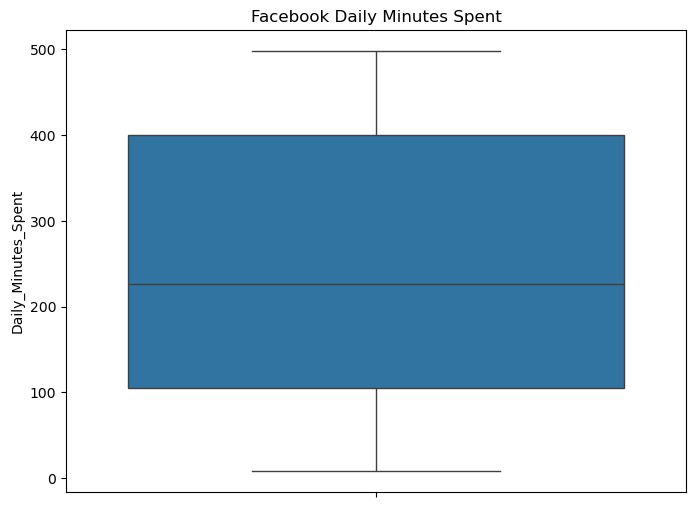

In [12]:
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for statistical plotting

# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Sets the figure size for better visibility

# Step 2: Plot a box plot for Facebook Daily Minutes Spent
# A box plot helps visualize the distribution, median, and potential outliers in the data
sns.boxplot(y=Facebook)

# Step 3: Add a title to the plot for better context
plt.title('Facebook Daily Minutes Spent')

# Step 4: Display the plot
plt.show()


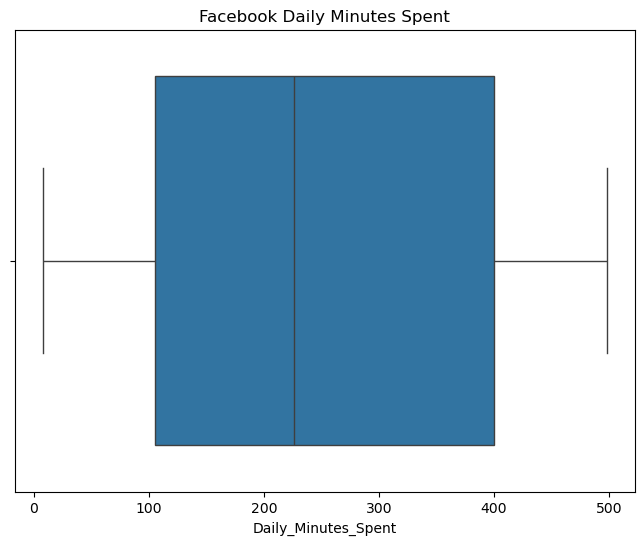

In [13]:
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for statistical plotting

# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Sets the figure size for better visibility

# Step 2: Plot a box plot for Facebook Daily Minutes Spent with 'x' axis
# A box plot helps visualize the distribution, median, and potential outliers in the data
sns.boxplot(x=Facebook)

# Step 3: Add a title to the plot for better context
plt.title('Facebook Daily Minutes Spent')

# Step 4: Display the plot
plt.show()


***INSTAGRAM***

In [14]:
# Step 1: Extract rows where the 'App' column is 'Instagram'
# 'df.loc[df['App'] == 'Instagram']' filters the dataset to keep only rows related to Instagram
Daily_Minutes_Spent = df.loc[df['App'] == 'Instagram']

# Step 2: Display the filtered dataset
print("Filtered dataset: Rows where 'App' is Instagram")
print(Daily_Minutes_Spent)  # Prints the extracted rows for easy review


Filtered dataset: Rows where 'App' is Instagram
    User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
2       U_3  Instagram                  351             13            120   
13     U_14  Instagram                  427              0            110   
24     U_25  Instagram                  280             13             42   
65     U_66  Instagram                  407             13            192   
69     U_70  Instagram                   36             20            134   
..      ...        ...                  ...            ...            ...   
972   U_973  Instagram                  293              0            167   
975   U_976  Instagram                  423             16             74   
980   U_981  Instagram                  311             14            102   
986   U_987  Instagram                  495             12            136   
996   U_997  Instagram                  499             14            110   

     Follows_Per_Day  
2   

In [15]:
# Step 1: Extract rows where the 'App' column is 'Instagram'
Instagram_Data = df.loc[df['App'] == 'Instagram']

# Step 2: Extract the 'Daily_Minutes_Spent' column from the filtered Instagram dataset
Instagram = Instagram_Data['Daily_Minutes_Spent']

# Step 3: Display the extracted column
print("Daily minutes spent on Instagram:")
print(Instagram)  # Prints the extracted values for easy review


Daily minutes spent on Instagram:
2      351
13     427
24     280
65     407
69      36
      ... 
972    293
975    423
980    311
986    495
996    499
Name: Daily_Minutes_Spent, Length: 140, dtype: int64


In [16]:
import numpy as np  # Importing NumPy for statistical calculations

# Step 1: Calculate the 25th percentile (Q1)
# The 25th percentile (Q1) represents the value below which 25% of the data falls
Q1 = np.percentile(Instagram, 25)

# Step 2: Calculate the 75th percentile (Q3)
# The 75th percentile (Q3) represents the value below which 75% of the data falls
Q3 = np.percentile(Instagram, 75)

# Step 3: Compute the Interquartile Range (IQR)
# The IQR is the range within which the middle 50% of the data lies
IQR = Q3 - Q1

# Step 4: Display the calculated values
print("75th Percentile (Q3):", Q3)
print("25th Percentile (Q1):", Q1)
print("Interquartile Range (IQR):", IQR)


75th Percentile (Q3): 402.25
25th Percentile (Q1): 110.5
Interquartile Range (IQR): 291.75


In [17]:
# Step 1: Calculate the lower bound for outliers
# Any value smaller than this is considered a potential outlier
lower_bound = Q1 - 1.5 * IQR

# Step 2: Calculate the upper bound for outliers
# Any value larger than this is considered a potential outlier
upper_bound = Q3 + 1.5 * IQR

# Step 3: Display the calculated bounds for reference
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)


Lower Bound for Outliers: -327.125
Upper Bound for Outliers: 839.875


In [18]:
# Step 1: Identify outliers based on the calculated lower and upper bounds
# The condition (Instagram < lower_bound) | (Instagram > upper_bound) checks if values fall outside the normal range.
# The .index method retrieves the row numbers of these outlier records.

outlier_indices = Instagram[(Instagram < lower_bound) | (Instagram > upper_bound)].index

# Step 2: Display the row indices of outlier records
print("Row numbers of outlier records:")
print(outlier_indices)  # Prints the indices where outliers are present


Row numbers of outlier records:
Index([], dtype='int64')


In [19]:
# Step 1: Print outlier rows based on identified indices
# 'df.loc[outlier_indices]' retrieves the rows from the original DataFrame
# where Instagram usage exceeds the upper bound or falls below the lower bound.

print("Outliers in Instagram Daily Usage Spent using the IQR method:")
print(df.loc[outlier_indices])  # Apply the row indices to the original DataFrame


Outliers in Instagram Daily Usage Spent using the IQR method:
Empty DataFrame
Columns: [User_ID, App, Daily_Minutes_Spent, Posts_Per_Day, Likes_Per_Day, Follows_Per_Day]
Index: []


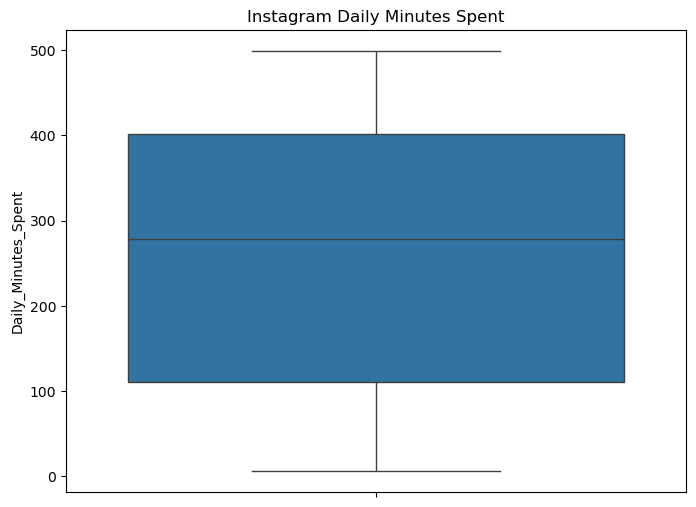

In [20]:
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for statistical plotting

# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Sets the figure size for better visibility

# Step 2: Plot a box plot for Instagram Daily Minutes Spent
# A box plot helps visualize the distribution, median, and potential outliers in the data
sns.boxplot(y=Instagram)

# Step 3: Add a title to the plot for better context
plt.title('Instagram Daily Minutes Spent')

# Step 4: Display the plot
plt.show()


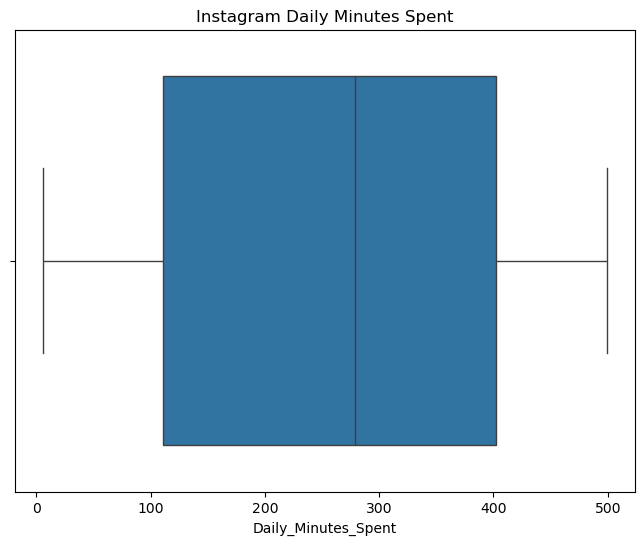

In [21]:
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for statistical plotting

# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Sets the figure size for better visibility

# Step 2: Plot a box plot for Instagram Daily Minutes Spent on the x-axis
# A box plot helps visualize the distribution, median, and potential outliers in the data
sns.boxplot(x=Instagram)

# Step 3: Add a title to the plot for better context
plt.title('Instagram Daily Minutes Spent')

# Step 4: Display the plot
plt.show()


# **Question 2**

In [22]:
# Q2). use dataset weight-height.csv. do outlier analysis for:
      # 1. Female heights
      # 2. Female weights
      # 3. Male heights
      # 4. Male weights

In [23]:
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/weight-height.csv')

In [24]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [25]:
import numpy as np  # Import NumPy for statistical calculations
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
import seaborn as sns  # Import Seaborn for statistical plotting

def outlier_analysis(G, HW):
    """
    Function to analyze outliers based on Interquartile Range (IQR).
    
    Parameters:
    G (str): Gender value used to filter the dataset ('Male' or 'Female')
    HW (str): Column name (either 'Height' or 'Weight')

    Returns:
    None (Displays box plot and prints outlier indices)
    """

    # Step 1: Extract rows based on gender
    # This filters the dataset to keep only rows related to the specified gender
    Body = df.loc[df['Gender'] == G]

    # Step 2: Extract the specified feature ('Height' or 'Weight')
    # We focus on analyzing either height or weight based on the given parameter HW
    Body_HW = Body[HW]

    # Step 3: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    # These values help in defining the spread of the data
    Q1 = np.percentile(Body_HW, 25)
    Q3 = np.percentile(Body_HW, 75)
    IQR = Q3 - Q1  # Interquartile Range (IQR) represents the middle 50% of the data

    # Step 4: Set lower and upper bounds for outliers
    # Values outside this range are considered outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 5: Identify outlier indices
    # Filtering rows where values are below lower_bound or above upper_bound
    outlier_indices = Body_HW[(Body_HW < lower_bound) | (Body_HW > upper_bound)].index

    # Step 6: Visualize using a box plot
    plt.figure(figsize=(4, 2))  # Adjust figure size for better readability
    sns.boxplot(y=Body_HW)  # Create box plot to visualize outliers
    plt.title(f'Outlier Analysis for {G} - {HW}')  # Dynamic title for clarity
    plt.show()

    # Step 7: Print outlier row numbers for further analysis
    print(f"Outlier indices for {G} - {HW}:")
    print(outlier_indices)


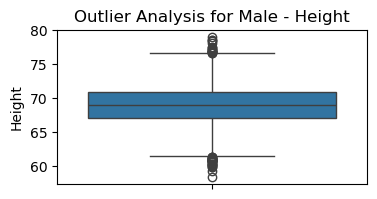

Outlier indices for Male - Height:
Index([ 426,  551,  912,  936,  994, 1238, 1317, 1339, 1442, 1577, 1715, 1922,
       1942, 2014, 2070, 2191, 2318, 2324, 2334, 2500, 2527, 2623, 2873, 2925,
       2959, 2974, 3020, 3265, 3285, 3332, 3547, 3669, 3757, 3816, 3909, 4170,
       4275, 4297, 4324, 4331, 4402, 4569, 4637, 4701, 4794, 4980],
      dtype='int64')


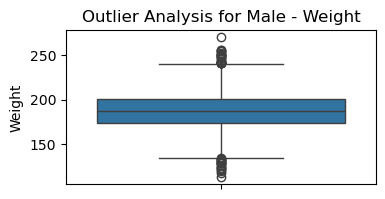

Outlier indices for Male - Weight:
Index([   0,  551,  565,  806,  994, 1238, 1506, 1577, 1610, 1651, 1750, 1896,
       1942, 1954, 2014, 2070, 2074, 2350, 2417, 2500, 2527, 2766, 2873, 2971,
       2974, 3090, 3140, 3228, 3285, 3332, 3664, 3669, 3757, 3909, 3918, 3996,
       4077, 4275, 4297, 4331, 4468, 4569, 4637, 4701, 4721, 4794],
      dtype='int64')


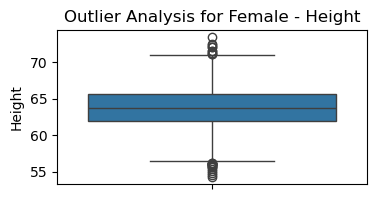

Outlier indices for Female - Height:
Index([5074, 5103, 5345, 5360, 5732, 5740, 6116, 6176, 6624, 6625, 6834, 6908,
       7162, 7294, 7311, 7617, 7856, 7924, 8003, 8135, 8241, 8464, 8635, 8692,
       9285, 9424, 9825],
      dtype='int64')


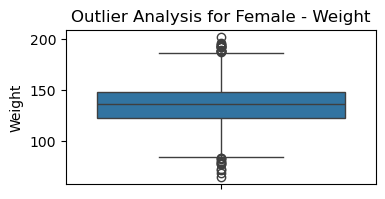

Outlier indices for Female - Weight:
Index([5214, 5360, 5662, 5740, 6258, 6624, 6687, 6982, 7294, 7311, 7527, 7856,
       7892, 7921, 7923, 7935, 8180, 8241, 8382, 8635, 8736, 8748, 8819, 9285,
       9310, 9566, 9633, 9846],
      dtype='int64')


In [26]:
outlier_analysis("Male", "Height")
outlier_analysis("Male", "Weight")
outlier_analysis("Female", "Height")
outlier_analysis("Female", "Weight")